<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling11/blob/main/Text_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn (recap)

In [167]:
import pandas as pd
from collections import Counter
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(gamma = 0.001, C = 100.)

In [158]:
uploaded = files.upload() # просим пользователя дать файл для обучения и тестирования, в нашем случае файл со спамом
filename = list(uploaded.keys())[0] # берём название файла
data = pd.read_csv(filename)
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
data = data.rename(columns = {"v1": "spam", "v2": "content"})

display(data)

Saving spam.csv to spam.csv


spam                                            content
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will �_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

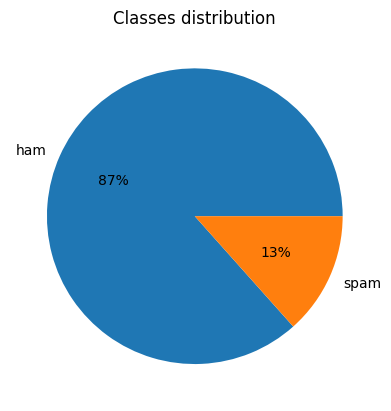

In [159]:
classes = pd.value_counts(data["spam"])
classes.plot(kind = 'pie',  autopct = '%0.f%%')
plt.title("Classes distribution")
plt.ylabel('')
plt.show()

In [164]:
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(data["content"])
print(vectorizer.get_feature_names_out()[1000:1020])

display(X.shape)
display(X.toarray())

['ak' 'aka' 'akon' 'al' 'alaikkum' 'alaipayuthe' 'albi' 'album' 'alcohol'
 'aldrine' 'alert' 'alertfrom' 'alerts' 'aletter' 'alex' 'alfie' 'algarve'
 'algebra' 'algorithms' 'ali']


(5572, 8357)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, data['spam'], test_size = 0.2, random_state = 50)

print(X_train.shape, X_test.shape)

(4457, 8357) (1115, 8357)


Строим наивный баесовский классификатор.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB(alpha = 0.330010)
bayes.fit(X_train, y_train) # тренируем модель

y_pred = bayes.predict(X_test) # тут предсказания

new_df = pd.DataFrame(data = y_test) # создаем датафрейм, где соотнесем ожидания и реальность
new_df["predicted"] = bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

Confusion matrix:
[[943  11]
 [  9 152]]


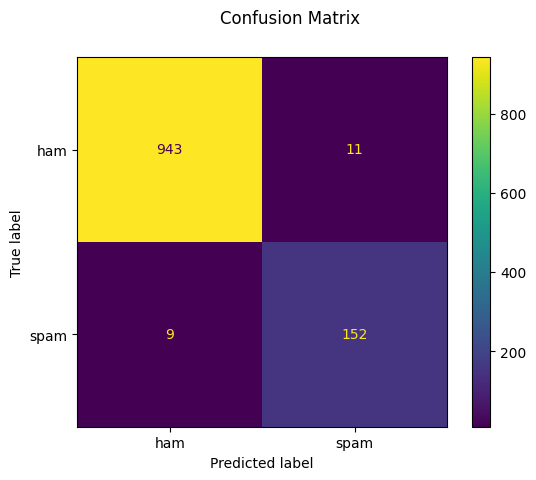

In [176]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Распознавание рукописных символов со scikit-learn

In [133]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

digits = datasets.load_digits()

Посмотрим на встроенный датасет, состоящий из 1797 изображений цифр размером 8x8 пикселей. Каждое изображение содержит одну цифру, написанную от руки.

Для каждого изображения в атрибуте `images` хранится массив (размером 8х8) со значениями оттенков серого.
В атрибуте `target` хранится цифра, которую представляет каждое изображение.

Программы предварительной обработки, предоставленные NIST, использовались для извлечения нормализованных растровых изображений рукописных цифр из предварительно отпечатанных форм. Из 43 человек 30 участвовали в обучающей выборке и еще 13 — в тестовой. Растровые изображения 32×32 делятся на неперекрывающиеся блоки размером 4×4, и количество включенных пикселей подсчитывается в каждом блоке. Это генерирует входную матрицу размером 8×8, где каждый элемент является целым числом в диапазоне 0..16. Это снижает размерность и дает инвариантность к небольшим искажениям.


In [ ]:
print(digits)

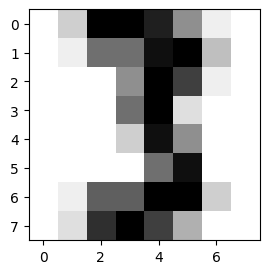

In [ ]:
plt.figure(1, figsize = (3, 3))
plt.imshow(digits.images[63], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.show()

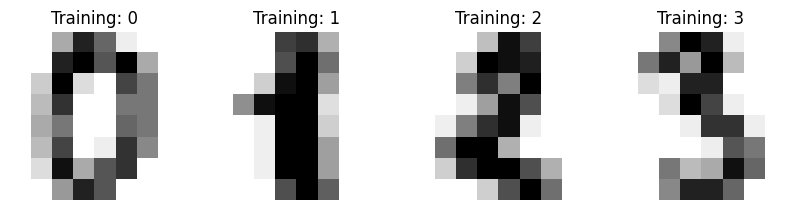

In [ ]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Training: %i" % label)

Попробуем построить модель, которая будет угадывать цифру, написанную от руки.

Вначале нужно задать статистическую оценку, которая нужна нам для предсказывания класса.
В Python'e один из варинатов статистической оценки для классификаторов - `sklearn.svm.SVC`, который использует [метод опорных векторов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2) (набор контролируемых методов обучения, используемых для классификации, регрессии и обнаружения выбросов). Некоторые преимущества такого метода:

* Эффективен в пространствах больших размеров.
* Эффективен в случаях, когда количество измерений превышает количество образцов.
* Использует подмножество обучающих точек в функции принятия решений (называемых опорными векторами), поэтому это также эффективно с точки зрения памяти.

`gamma` определяет, какое влияние имеет один обучающий пример. `C` компенсирует неправильную классификацию обучающих примеров.



In [ ]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(gamma = 0.001, C = 100.)

Давайте для начала обучим нашу модель на всём датасете, который у нас есть, за исключением одной цифры, которую мы затем попроубем предсказать.

In [ ]:
clf.fit(digits.data[:-1], digits.target[:-1])
SVC(C = 100.0, gamma = 0.001)

SVC(C=100.0, gamma=0.001)

Теперь попробуем предсказать оставшуюся цифру. Но для начала посмотрим на неё.

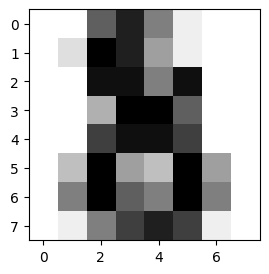

In [ ]:
plt.figure(1, figsize = (3, 3))
plt.imshow(digits.images[-1], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.show()

In [ ]:
clf.predict(digits.data[-1:])

array([8])

Согласны?

Теперь давайте попробуем натренировать модель более "честным" образом. Разделим исходный датасет на две части - для тренировки и для проверки обученной модели.

Вначале нам нужно "расплющить" 2-D изображения (вернее массивы значений оттенков серого) до одномерных.

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf = svm.SVC(gamma = 0.001) # создаём классификатор (метод опорных векторов)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size = 0.50, shuffle = False
) # делим датасет две части: одна для обучения, другая для проверки
clf.fit(X_train, y_train) # обучаем

SVC(C=100.0, gamma=0.001)

In [ ]:
predicted = clf.predict(X_test)

Выводим изображения и цифры, которые для них предсказала модель.

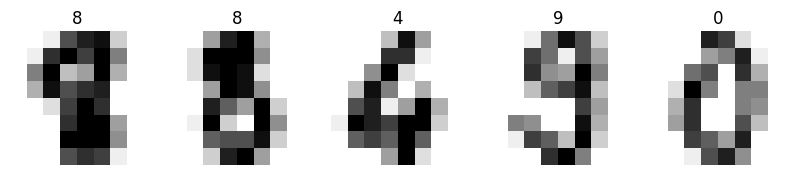

In [ ]:
_, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(prediction)

Посмотрим на отчет о работе классификатора, а именно о его точности.

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Также мы можем построить матрицу неточностей - таблицу, которая демонстрирует эффективность алгоритма классификации путем сравнения прогнозируемого значения целевой переменной с ее фактическим значением.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


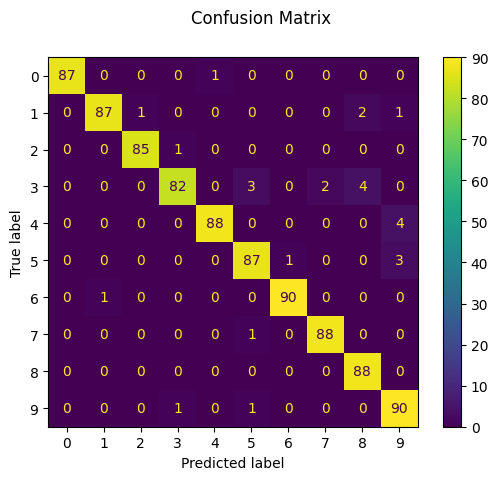

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Распознавание текста на картинках

Сегодня мы посмотри на библиотеку **Tesseract OCR** (Optical Charachter Rcognition, Оптическое распознавание символов).

**Tesseract** – это программный движок с открытым исходным кодом, позволяющий распознавать символы с поддержкой кодировки Unicode и возможностью распознавания более 100 языков.

**Tesseract** был впервые разработан в середине 1980-х годов, но не приобрел большой популярности.Только в 2005 году этот проект возобновили при финансвой поддержке Google.

Вот длиннющий список языков, которые он поддерживает:

**Русский**, **Английский**, Азербайджанский, **Арабский**, Белорусский, Бенгальский, Болгарский, Венгерский, Вьетнамский, Греческий, Датский, Иврит, Индонезийский, Испанский, Итальянский, Казахский, Каталонский, Китайский, Корейский, Кхмерский, Латвийский, Литовский, Монгольский, Немецкий, Нидерландский, Норвежский, Персидский, Польский, Португальский, Сербский, Татарский, Турецкий, Украинский, Фарси, Финский, Французский, Хинди, Хорватский, Чешский, Шведский, Эстонский, Японский.

Программа распространяется бесплатно и доступна для использования по лицензии Apache 2.0.

Программное обеспечение Tesseract может быть использовано непосредственно или при помощи API, позволяя извлекать печатный текст из изображений.

Простой механизм **OCR** применяет множество различных хранимых шаблонов шрифтов и изображений текста в качестве шаблонов. Программное обеспечение OCR использует алгоритмы сопоставления шаблонов для посимвольного сравнения изображений текста с внутренней базой данных. Подход, при котором система сопоставляет текст слово за словом, называется оптическим распознаванием слов. Он имеет свои ограничения, поскольку существует практически неограниченное количество шрифтов и стилей почерка, и каждый отдельный тип не может быть учтен и сохранен в базе данных.

**Ещё минусы**: этот метод не очень хорошо работает с рукописным текстом, сложными изображениями реального мира и нечеткими изображениями или изображениями, которые содержат не только текст.

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,762 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
!pip install pytesseract

In [3]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
import cv2

In [121]:
loaded_file = files.upload() # просим пользователя дать картинку

Saving Image with text (eng).jpg to Image with text (eng).jpg


In [123]:
filename = list(loaded_file.keys())[0] # сохраняем название файла, при желании следующие операции можно делать с несколькими картинками

In [124]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # изменяем цвета, так как сканер распознаёт только чёрный текст

In [46]:
config = r'--oem 3 --psm 6'

Предварительно, мы можем посмотреть ориентацию текста (если текст написан не под наклоном, то алгоритму легче его распознавать), есть ли вообще какой-то текст на картинке и то, с помощью какого алфавита он написан.

In [47]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 10.86
Script: Latin
Script confidence: 10.56



Теперь самое главное - конвертируем текст изображения в строку, которую мы сможем использовать дальше как обычный объект Python'a (или мы можем, например, передать текст куда-нибудь дальше).

In [48]:
text_image = pytesseract.image_to_string(img, config = config)
print(text_image)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



Можем сохранить результат как распознанный `.pdf`!

По дефолту информация в .pdf хранится в сериях байтов, поэтому нам нужно открыть файл для записи в бинарном режиме.

In [49]:
pdf = pytesseract.image_to_pdf_or_hocr(img, extension = 'pdf')
with open('test.pdf', 'w+b') as f: # открывает файл в бинарном режиме только для записи
    f.write(pdf)

Мы можем сделать кое-что ещё. Функция `image_to_data()` выводит много информации, включая слова с соответствующими им шириной, высотой и координатами x, y, что позволит нам сделать много полезного. Например, мы можем найти слова в документе и нарисовать ограничивающую рамку вокруг определенного слова по нашему выбору.

In [125]:
data = pytesseract.image_to_data(img, config = config)

In [ ]:
print(data)

In [135]:
image_copy = img.copy() # делаем копию изображения, на которой будем потом рисовать
target_word = "fox" # задаем слово, которое мы хотим найти
# мы хотим, чтобы выходные данные были структурированны
# в виде словаря, чтобы нам было проще найти местоположение каждого слова
data = pytesseract.image_to_data(img, output_type = pytesseract.Output.DICT)
print(data)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 

In [143]:
# получаем все вхождения нужного слова
word_occurences = [i for i, word in enumerate(data["text"]) if word.lower() == target_word]
print(word_occurences)

['', '', '', '', 'This', 'is', 'a', 'lot', 'of', '12', 'point', 'text', 'to', 'test', 'the', '', 'ocr', 'code', 'and', 'see', 'if', 'it', 'works', 'on', 'all', 'types', '', 'of', 'file', 'format.', '', '', 'The', 'quick', 'brown', 'dog', 'jumped', 'over', 'the', '', 'lazy', 'fox.', 'The', 'quick', 'brown', 'dog', 'jumped', '', 'over', 'the', 'lazy', 'fox.', 'The', 'quick', 'brown', 'dog', '', 'jumped', 'over', 'the', 'lazy', 'fox.', 'The', 'quick', '', 'brown', 'dog', 'jumped', 'over', 'the', 'lazy', 'fox.']
[]


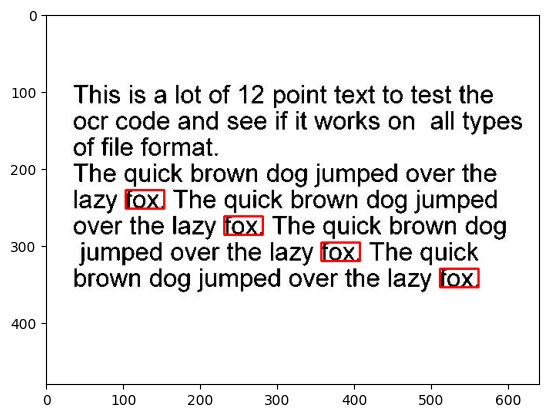

In [144]:
# и рисуем рамки вокруг найденных слов
for occ in word_occurences:
  # извлекаем ширину, высоту, верхнюю и левую позицию для обнаруженного слова
  w = data["width"][occ]
  h = data["height"][occ]
  l = data["left"][occ]
  t = data["top"][occ]
  # определяем все точки окружающей рамки
  p1 = (l, t)
  p2 = (l + w, t)
  p3 = (l + w, t + h)
  p4 = (l, t + h)
  # рисуем 4 линии (прямоугольник)
  image_copy = cv2.line(image_copy, p1, p2, color = (255, 0, 0), thickness = 2)
  image_copy = cv2.line(image_copy, p2, p3, color = (255, 0, 0), thickness = 2)
  image_copy = cv2.line(image_copy, p3, p4, color = (255, 0, 0), thickness = 2)
  image_copy = cv2.line(image_copy, p4, p1, color = (255, 0, 0), thickness = 2)
plt.imsave("all_fox_words.png", image_copy)
plt.imshow(image_copy)
plt.show()

Мы можем выделить вообще все слова, чтобы посмотреть, есть ли такие, которые алгоритм не распознал.

In [37]:
from google.colab.patches import cv2_imshow

In [ ]:
for i, el in enumerate(data.splitlines()):
	if i == 0:
		continue
	el = el.split()
	try:
		# обведем каждое слово в прямоугольничек
		x, y, w, h = int(el[6]), int(el[7]), int(el[8]), int(el[9])
		cv2.rectangle(img, (x, y), (w + x, h + y), (255, 255, 0), 1)
		cv2.putText(img, el[11], (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 1)
	except IndexError:
		continue

# отображаем фото
cv2_imshow(img) # в google.colab нужно использовать этот метод, потому что cv2.imshow всё ломает

# Проверим на русском!

In [84]:
uploaded = files.upload() # просим пользователя дать картинку
filename = list(uploaded.keys())[0] # берём название файла

Saving Rus text.pdf to Rus text.pdf


Проблемы могут возникнуть, если мы хотим импортировать файл формата `.pdf`, потому что Tesseract работает только с изображениями.

Но это не беда! Если получим на вход файл формата `.pdf`, просто переконвертируем его в один из форматов изображений.

Вначал идёт более сложный код, который конвертирует `.pdf` файл в изображение, а затем архивирует его и выдаёт на скачивание. Код взят [отсюда](https://colab.research.google.com/github/C0A20103/Convert-PDF-to-PNG-on-colab/blob/main/Convert_PDF_to_PNG.ipynb#scrollTo=ilAaxz2Z0jyu). Мы не будем им пользоваться, но я оставлю его здесь, потому что код полезный (по ссылке более полная версия кода с интерактивом).

In [73]:
!apt install poppler-utils &> /dev/null
!pip install pdf2image tqdm &> /dev/null

In [74]:
from time import time
import zipfile
from tqdm import tqdm
from pdf2image import convert_from_bytes, convert_from_path
from IPython.display import Image, display

In [83]:
extension = 'JPEG'
dpi = 200
for fn in uploaded.keys():
    print(f'Converting {fn}...')
    currentDir = f'tmp_{int(time()*1000)}'
    os.makedirs(currentDir, exist_ok = True)
    pdfDir = os.path.join(currentDir, fn)
    shutil.move(fn, pdfDir)
    if(pdfDir.lower()[-4:] != '.pdf'):
        print(f'{fn} is not PDF file!')
        continue
    images = convert_from_bytes(uploaded[fn], dpi = dpi, thread_count = os.cpu_count())
    zipDir = os.path.join(currentDir, f'{fn[:-4]}.zip')
    with zipfile.ZipFile(zipDir, 'w', compression = zipfile.ZIP_DEFLATED) as new_zip:
        with tqdm(images, unit = 'p') as pbar:
            for number, page in enumerate(pbar, 1):
                name = f'{fn[:-4]}_{number}.{extension.lower()}'
                name = os.path.join(currentDir, name)
                page.save(name, extension)
                new_zip.write(name, arcname = os.path.basename(name))
                pbar.set_postfix_str(f'{os.path.getsize(zipDir):,} bytes')
    print('Convert completed.', 'The download will start...', sep='\n')
    files.download(zipDir)
print('Finished.')

Converting Rus text.pdf...


100%|██████████| 1/1 [00:00<00:00, 10.66p/s, 404,111 bytes]

Convert completed.
The download will start...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Finished.


Мы будем пользоваться вот этим кодом. Коротеньким.

In [91]:
if '.pdf' in filename:
  images = convert_from_path(filename)
  images[0].save(filename[:-4] + '.jpg', 'JPEG')
  filename = filename[:-4] + '.jpg'
print(filename)

Rus text.jpg


Tesseract по дефолту работает только с английский языком, поэтому остальные языки нужно специально импортировать. Таким образом мы импортируем в том числе и файл, на котором программа тренировалась с тем или иным языком.

In [94]:
!sudo apt install tesseract-ocr-rus
# либо можно просто написать !sudo apt install tesseract-ocr-all, чтобы установить все языки
# это удобно, если вы работает не в google.colab...

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 1,271 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-rus all 1:4.00~git30-7274cfa-1.1 [1,271 kB]
Fetched 1,271 kB in 1s (1,754 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-rus.
(Readin

In [95]:
img = cv2.imread(filename) # считываем картинку
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # делаем её нужной цветовой гаммы
print(pytesseract.image_to_osd(img)) # проверяем ориентацию и вообще есть ли распознаваемый текст на картинке

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 5.53
Script: Cyrillic
Script confidence: 10.89



Также язык нужно специально задать при считывании изображения. Тессеракт сам не умеет распознавать язык (но умеет распознавать алфавит).
Это может представить некоторые сложности при, например, получении изображений с текстами на разных языкых от пользователя. Надо отедельно просить его указать язык, текст на котором он хочет распарсить. Вот [тут](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html) лежат коды языков, которые использует Тессеракт.

In [96]:
config = r'--oem 3 --psm 6'
text_image = pytesseract.image_to_string(img, config = config, lang = 'rus')
print(text_image)

СИНТАКСИС
° Предмет синтаксиса
Синтаксис - это раздел грамматики, исследующий правила соче-
тания слов между собой обобщенные значения этих сочетаний, а так-
зе типы предложений по их структуре и цели высказывания.В процес-
се речи слова связызаются друг с другом по определенным правилам.
Е этим правилам относятся как типы связи слов(проявляющиеся з от-
дельных случаях в словоизменительных морфемах), так и порядок их
расположения, При монологе речь распадается (разделяется) на от-
. резки, которые, с одной стороны, обусловлены особенностями функци-
онирования органов речи( обычно речь человека ведетоя во время вы-
} доха, хотя может произноситься и при вдохе),с другой - зависят от
смыслового членения.Как правило, членение речи, вызываемое пауза-
: ми, обусловленное особенностями функционирования органов речи, со-
зпадавт оо смысловым, но может и не совпадать.
Переходы между паузами, совпадающие со смысловым членением, -
назовем их синтагмами, - в свою очередь, разделяются на мелкие от-

Сохраним обратно в `.pdf` на всякий случай.

In [98]:
pdf = pytesseract.image_to_pdf_or_hocr(img, extension = 'pdf', lang = 'rus') # здесь тоже нужно обязательно указать язык
with open('test_rus.pdf', 'w+b') as f:
    f.write(pdf)

# Проверим на классическом арабском!

In [101]:
!sudo apt install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 645 kB of archives.
After this operation, 1,447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 645 kB in 1s (982 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ara.
(Reading databa

In [116]:
uploaded = files.upload() # просим пользователя дать картинку
filename = list(uploaded.keys())[0] # берём название файла
print(filename)

Saving text_arabic.jpg to text_arabic (1).jpg
text_arabic (1).jpg


In [117]:
img = cv2.imread(filename) # считываем картинку
#cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # делаем её нужной цветовой гаммы
print(pytesseract.image_to_osd(img)) # проверяем ориентацию и вообще есть ли распознаваемый текст на картинке

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 18.92
Script: Arabic
Script confidence: 83.89



In [118]:
config = r'--oem 3 --psm 6'
text_image = pytesseract.image_to_string(img, config = config, lang = 'ara')
print(text_image)

المذكور أعغلاه: ولما كانت مادة العقاب بالقانون الإتحادي رقم ‎٠١‏ الصادر بتاريخ
-1111-05م؛ رقم 55 قد نصت في الفقرة * منها بشأن الأقعال المعاقب عليها بعقوبة
الحبس سنة وبالغرامة على أنه (كل من قاد طائرة وهو في حالة سكر تؤدي إلى إضعاف مقدرته
على قيادة الطائرة)» وكانت المادة ‎'*/١‏ ' *' من ذات القانون -في بند تعريفاته- قد نصت على
أن (قائد الطائرة : الطيار المسؤول عن تشغيل وسلامة الطائرة في أثناء فترة الطيران) وأن (فترة
الطيران : الوقت الكلي الواقع بين اللحظة التي تبدأ فيها الطائرة حركتها بفعل قوتها الذاتية لغرض
الإقلاع حتى لحظة توقفها عن الحركة بعد إنتهاء طيرانها)» وكانت المادة ‎١١‏ من ذات القانون
كذلك قد نصت على أن (قائد الطائرات مسؤول عن تشغيل الطائرة وسلامثها بمن عليها في أثناء
فترة الطيران» وله سلطة اتخاذ التدابير اللازمة لحفظ النظام على متنهاء وعليه مراعاة تطبيق
القواعد المعمول بها في هذا الشأن) » لما كان ذلك وكانت الواقعة ومن خلال البحث في طياتها
قد تبين أن الطائرة لم تبارح أرض المطار ولم تكن بصدد الطيران ولم يكن قائدها في فترة الطيران
المبينة وفقا لمفهوم نص مواد القانون سالف الذكرء و

In [120]:
pdf = pytesseract.image_to_pdf_or_hocr(img, extension = 'pdf', lang = 'ara') # здесь тоже нужно обязательно указать язык
with open('test_ara.pdf', 'w+b') as f:
    f.write(pdf)

# Проверим на печатном тексте, но написанном от руки!

In [145]:
uploaded = files.upload() # просим пользователя дать картинку
filename = list(uploaded.keys())[0] # берём название файла
print(filename)

Saving Handwritten text (eng).jpg to Handwritten text (eng).jpg
Handwritten text (eng).jpg


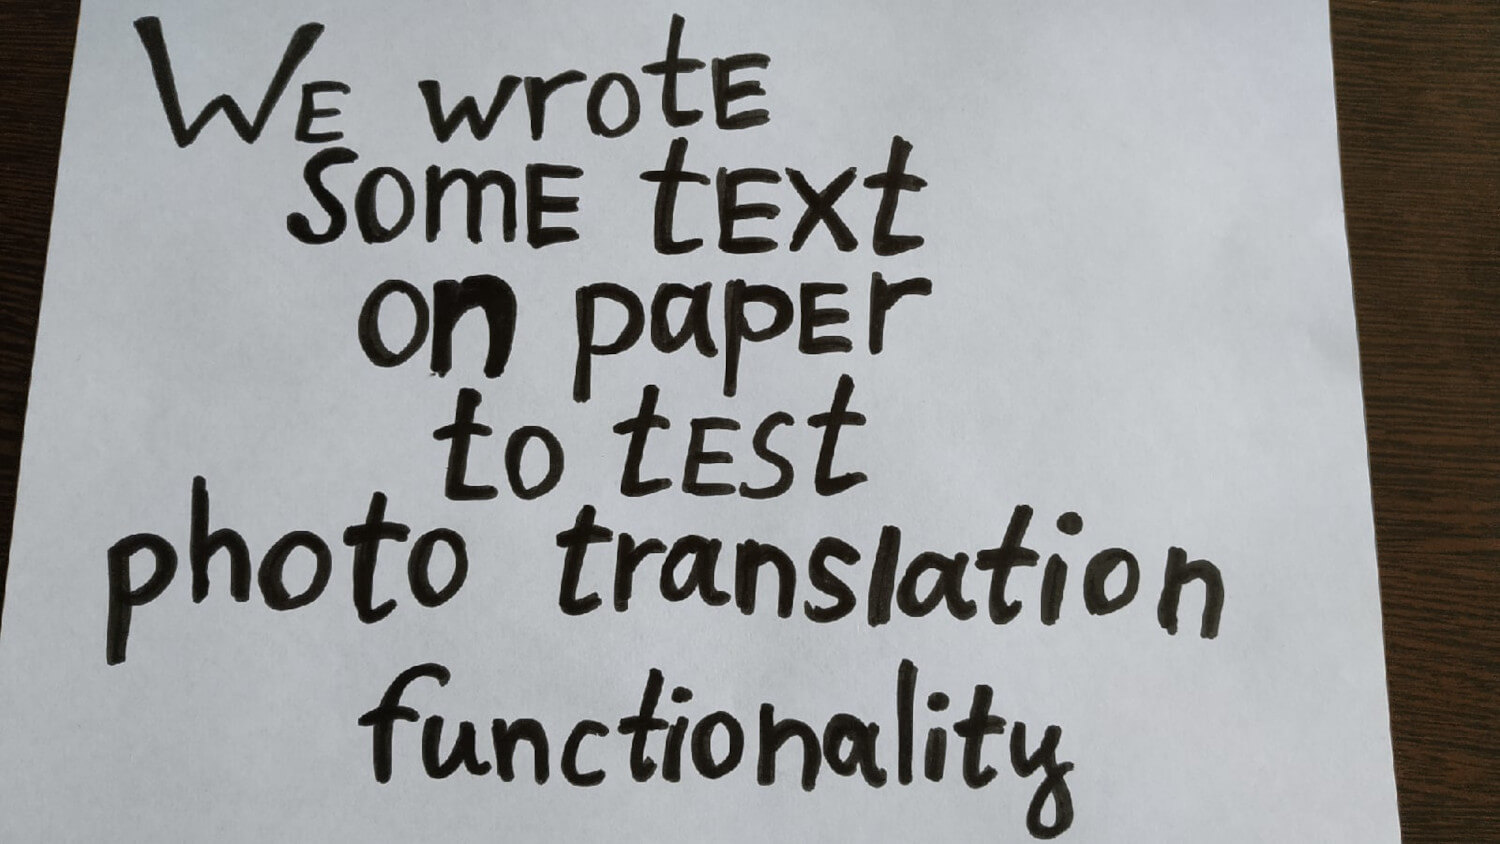

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.48
Script: Greek
Script confidence: 0.00



In [146]:
img = cv2.imread(filename) # считываем картинку
#cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # делаем её нужной цветовой гаммы
print(pytesseract.image_to_osd(img)) # проверяем ориентацию и вообще есть ли распознаваемый текст на картинке

In [147]:
config = r'--oem 3 --psm 6'
text_image = pytesseract.image_to_string(img, config = config)
print(text_image)

\We wrote
Some text
On paper
to test
pho to translation
functionality



Как думаете, неплохо?

# Проверим на собственной шкуре

Пример №1.


In [148]:
uploaded = files.upload() # просим пользователя дать картинку
filename = list(uploaded.keys())[0] # берём название файла
print(filename)

Saving rus_handwritten.jpg to rus_handwritten.jpg
rus_handwritten.jpg


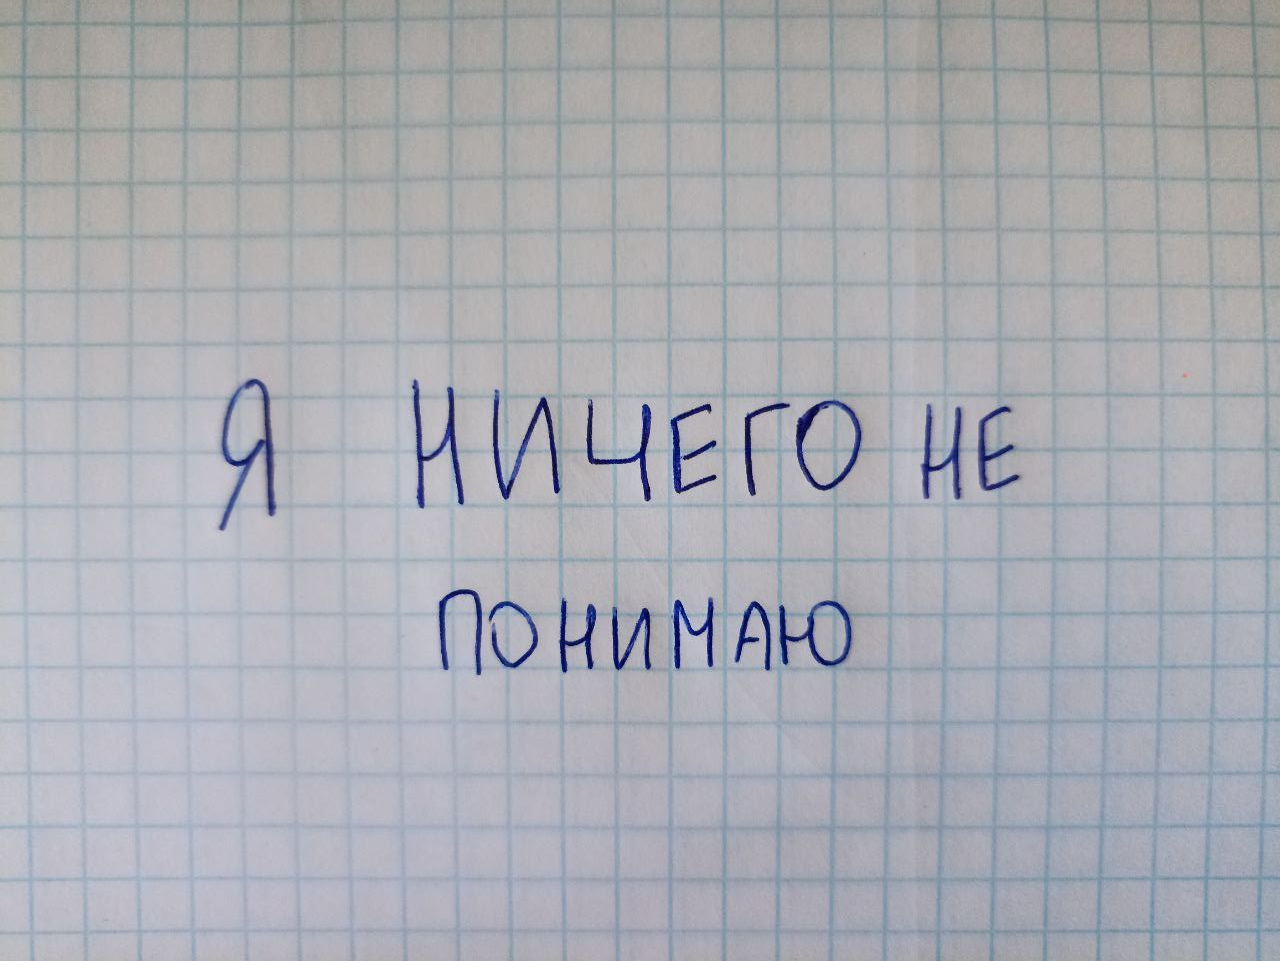

TesseractError: ignored

In [149]:
img = cv2.imread(filename) # считываем картинку
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # делаем её нужной цветовой гаммы
print(pytesseract.image_to_osd(img)) # проверяем ориентацию и вообще есть ли распознаваемый текст на картинк

Слишком мало символов для обработки. Поэтому Tesseract не может с уверенностью сказать про угол наклона и алфавит.

In [150]:
config = r'--oem 3 --psm 6'
text_image = pytesseract.image_to_string(img, config = config, lang = 'rus')
print(text_image)

Я ИИЧЕГО ИЕ
ПОНИМАЮ



Пример №2.

In [151]:
uploaded = files.upload() # просим пользователя дать картинку
filename = list(uploaded.keys())[0] # берём название файла
print(filename)

Saving rus_handwritten_2.jpg to rus_handwritten_2.jpg
rus_handwritten_2.jpg


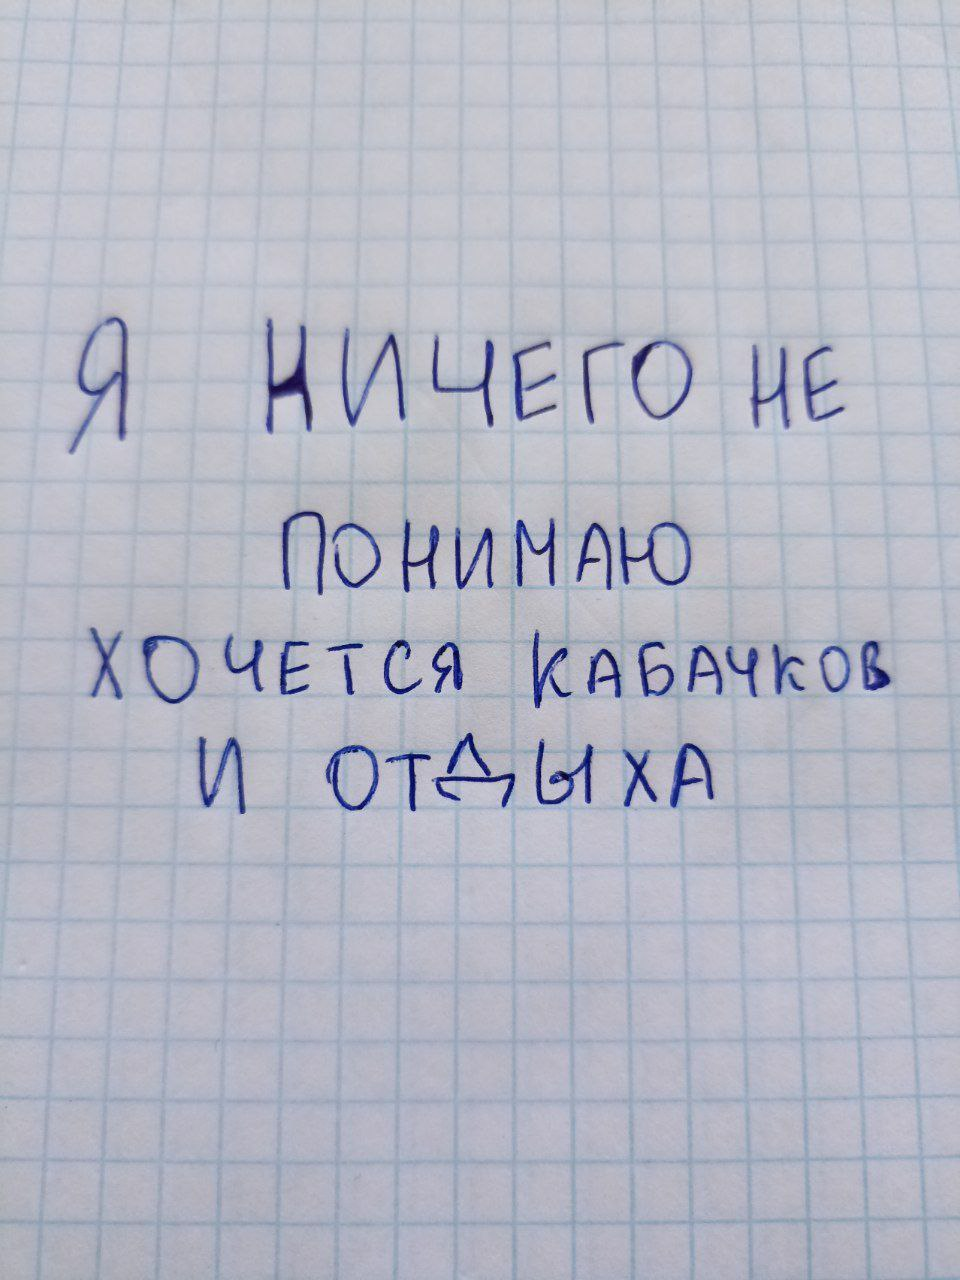

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.66
Script: Cyrillic
Script confidence: 1.67



In [152]:
img = cv2.imread(filename) # считываем картинку
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # делаем её нужной цветовой гаммы
print(pytesseract.image_to_osd(img)) # проверяем ориентацию и вообще есть ли распознаваемый текст на картинк

In [153]:
config = r'--oem 3 --psm 6'
text_image = pytesseract.image_to_string(img, config = config, lang = 'rus')
print(text_image)

Я НИЧЕГО ИЕ
ПОНИМАЮ
ХОЧЕТСЯ КарРЧков
И ОТ ЯхА



In [154]:
uploaded = files.upload() # просим пользователя дать картинку
filename = list(uploaded.keys())[0] # берём название файла
print(filename)

Saving rus_handwritten_3.jpg to rus_handwritten_3.jpg
rus_handwritten_3.jpg


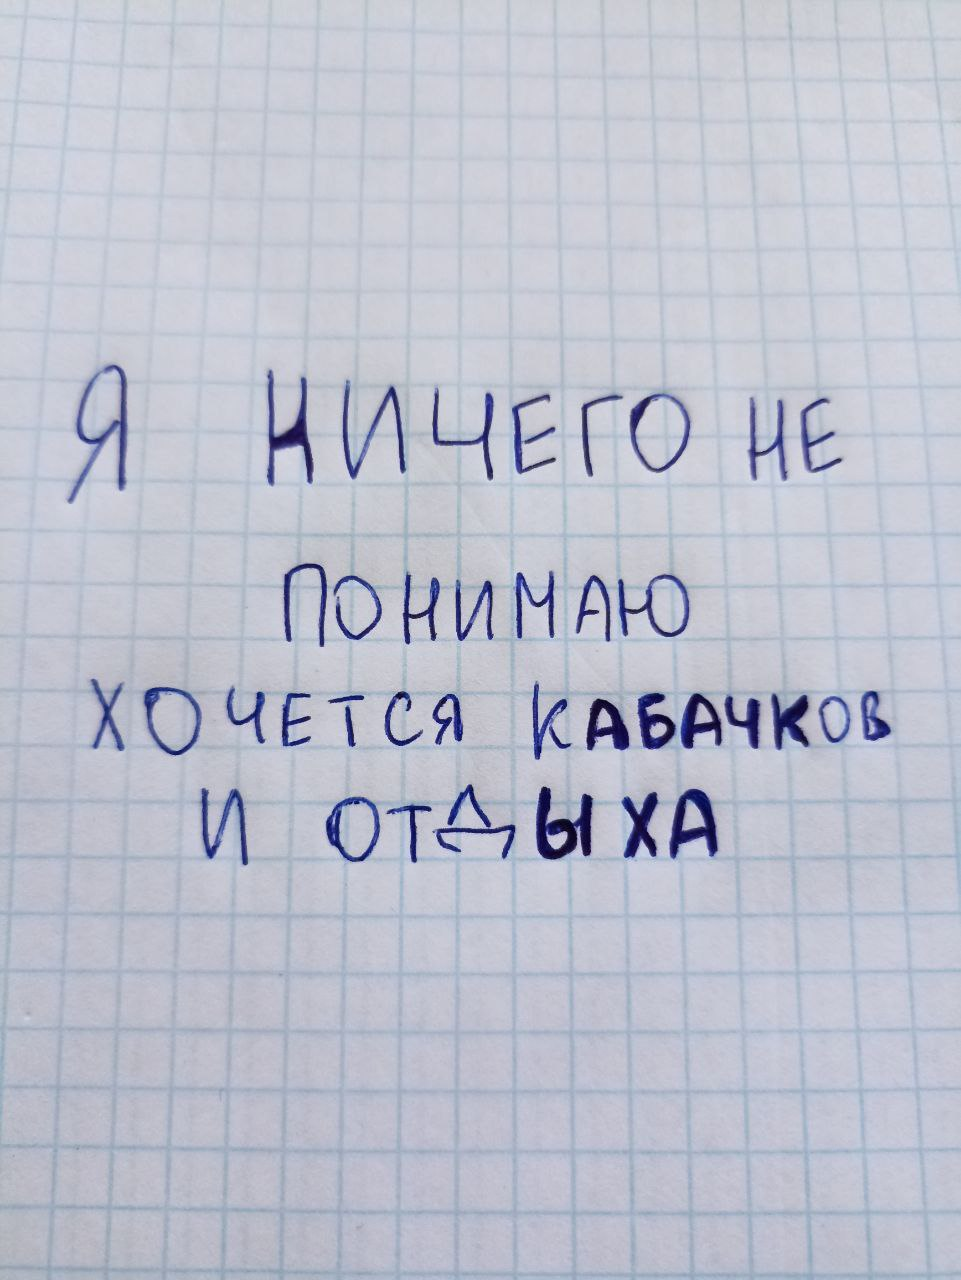

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.60
Script: Cyrillic
Script confidence: 6.67



In [155]:
img = cv2.imread(filename) # считываем картинку
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # делаем её нужной цветовой гаммы
print(pytesseract.image_to_osd(img)) # проверяем ориентацию и вообще есть ли распознаваемый текст на картинк

In [156]:
config = r'--oem 3 --psm 6'
text_image = pytesseract.image_to_string(img, config = config, lang = 'rus')
print(text_image)

Я НИЧЕГО ИЕ
ПОНИМАЮ
ХОЧЕТСЯ КАБРЧКОв
И От^Ы ХА



Мы с вами посмотрели на одну из программ **оптического распознавания символов**. Есть ещё другие программы того же рода: например, PaddleOCR (в отличие от Tesseract'a у него есть встроенный классификатор ориентации текста), EasyOCR.

Но есть, как не сложно догадаться, программы, основанные на других принципах, которые справляются в разы лучше.

Эти программы - **программы интеллектуального распознавания символов**.

Современные системы OCR используют технологию **интеллектуального распознавания символов** (ICR) для считывания текста так же, как это делает человек. Они используют передовые методы машинного обучения человеческим навыкам чтения. Система машинного обучения, называемая нейронной сетью, анализирует текст на многих уровнях, многократно обрабатывая изображение. Она ищет различные атрибуты изображения (кривые, линии, пересечения и петли) и объединяет результаты различных уровней анализа для получения окончательного результата. Несмотря на то, что ICR обрабатывает изображения по символам, процесс не занимает много времени, а результаты получаются за считанные секунды.

Мы на них попробуем посмотреть в следующий раз!
